In [1]:
#import the necessary packages
!pip install biopython gudhi
import matplotlib
import pandas as pd
from Bio.PDB import PDBParser
import gudhi as gd
import plotly.graph_objects as go
import os
import numpy as np
import pickle as pickle
from pylab import *
from mpl_toolkits.mplot3d import Axes3D

DEPRECATION: Loading egg at /Applications/anaconda3/lib/python3.11/site-packages/pyobjc_framework_Cocoa-11.0-py3.11-macosx-10.9-x86_64.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at /Applications/anaconda3/lib/python3.11/site-packages/py_applescript-1.0.3-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at /Applications/anaconda3/lib/python3.11/site-packages/pyobjc_framework_AppleScriptKit-11.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at /Applications/anac

In [2]:
#load the pdb file
pdb_path='/Users/adampratt/Downloads/5uow.pdb'
parser = PDBParser()
structure = parser.get_structure("protein", pdb_path)

/Applications/anaconda3/lib/python3.11/site-packages/Bio/PDB/StructureBuilder.py:100: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 37033.
  warnings.warn(


In [11]:
#make our point cloud
cloud=[]
for model in structure:
    for chain in model:
        for residue in chain:
            for atom in residue:
                cloud.append(np.array(atom.coord))
cloud2=np.concatenate(cloud)
cloud3=cloud2.reshape(int(len(cloud)),3)
print(type(cloud3))


<class 'numpy.ndarray'>


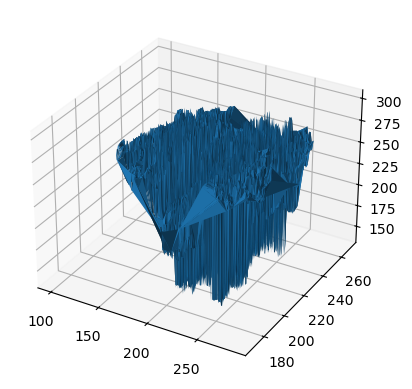

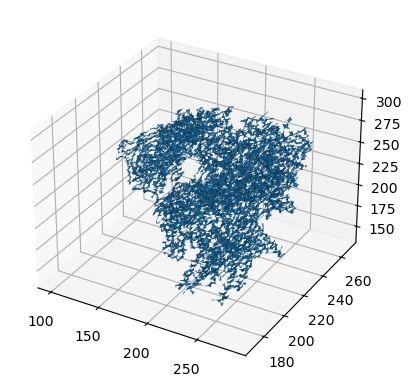

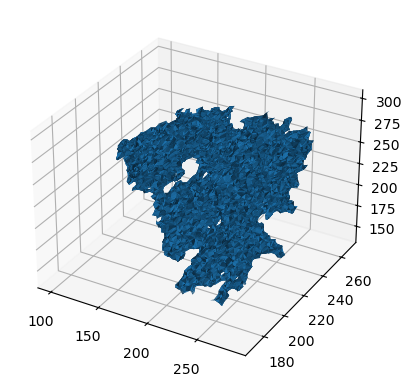

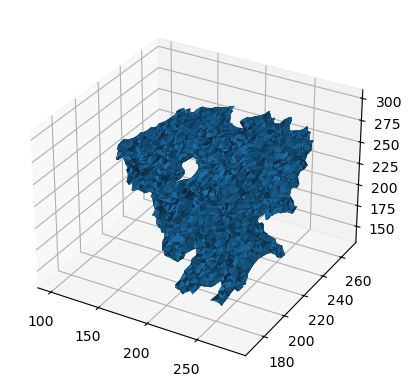

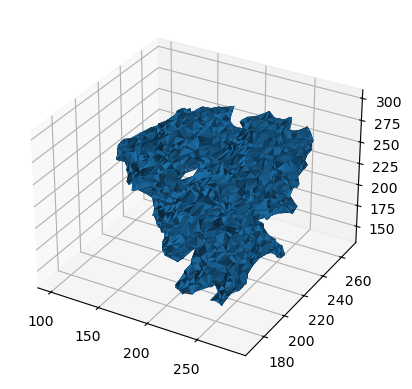

In [17]:
#create the alpha complex
ac=gd.AlphaComplex(cloud3)
st = ac.create_simplex_tree()
points = np.array([ac.get_point(i) for i in range(st.num_vertices())])
# We want to plot the alpha-complex with alpha=0.1.
# We are only going to plot the triangles
#animate 5 different alpha values
for r in [0,2,8,16,32]:
    triangles = np.array([s[0] for s in st.get_skeleton(2) if len(s[0])==3 and s[1] <= r])

    #plot the alpha complex
    from mpl_toolkits.mplot3d import Axes3D
    import matplotlib.pyplot as plt
    fig = plt.figure()
    ax = plt.axes(projection='3d')
    ax.plot_trisurf(points[:,0], points[:,1], points[:,2], triangles=triangles)
    plt.show()


The alpha complex doesn't tell us all that much about a protein on its own,so we better compute some homology and plot some barcodes.

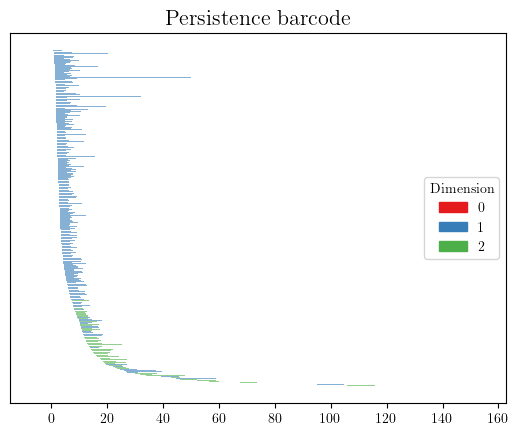

In [25]:
ac=gd.AlphaComplex(cloud3)
st = ac.create_simplex_tree()
diag = st.persistence(min_persistence=3)

gd.plot_persistence_barcode(diag)
plt.show()